# 데이터 불러오기

In [1]:
# 라이브러리 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 데이터 불러오기
data = pd.read_csv('data_week4.csv', encoding='cp949')
data.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_16136\3724865229.py:8: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data_week4.csv', encoding='cp949')


,Unnamed: 0,line,name,mold_name,time,date,count,working,emergency_stop,molten_temp,...,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,registration_time,passorfail,tryshot_signal,mold_code,heating_furnace
0,0,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:06,258,가동,ON,731.0,...,1449.0,550.0,700.0,34.0,23,2019-01-02 16:45:06,0.0,NaN,8722,NaN
1,1,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:08,243,가동,ON,720.0,...,NaN,481.0,0.0,30.0,25,2019-01-02 16:45:08,0.0,NaN,8412,B
2,2,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:58,244,가동,ON,721.0,...,NaN,481.0,0.0,30.0,25,2019-01-02 16:45:58,0.0,NaN,8412,B
3,3,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:48:03,245,가동,ON,721.0,...,NaN,483.0,0.0,30.0,25,2019-01-02 16:48:03,0.0,NaN,8412,B
4,4,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:50:08,246,가동,ON,721.0,...,NaN,486.0,0.0,30.0,25,2019-01-02 16:50:08,0.0,NaN,8412,B


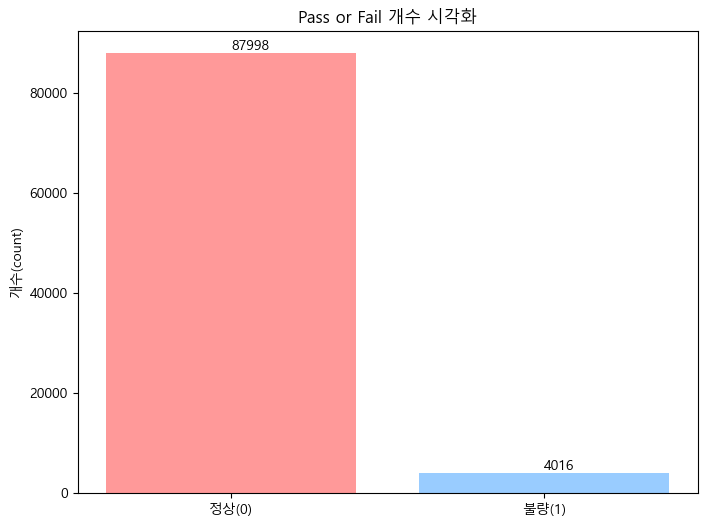

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

passorfail_counts = pd.Series([87998, 4016])
plt.figure(figsize=(8,6))
passorfail_counts = data['passorfail'].value_counts()
pastel_colors = ['#ff9999', '#99ccff']
bars = plt.bar(passorfail_counts.index, passorfail_counts.values, tick_label=['정상(0)', '불량(1)'], color=pastel_colors)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')
    

plt.title("Pass or Fail 개수 시각화")

plt.ylabel("개수(count)")
plt.show()



In [3]:
data = data[data['tryshot_signal'] != 'D']

### KDE그래프 그려보기

C:\Users\USER\AppData\Local\Temp\ipykernel_16136\2813721676.py:17: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data, x=column, hue='passorfail', ax=axes[i], common_norm=False)


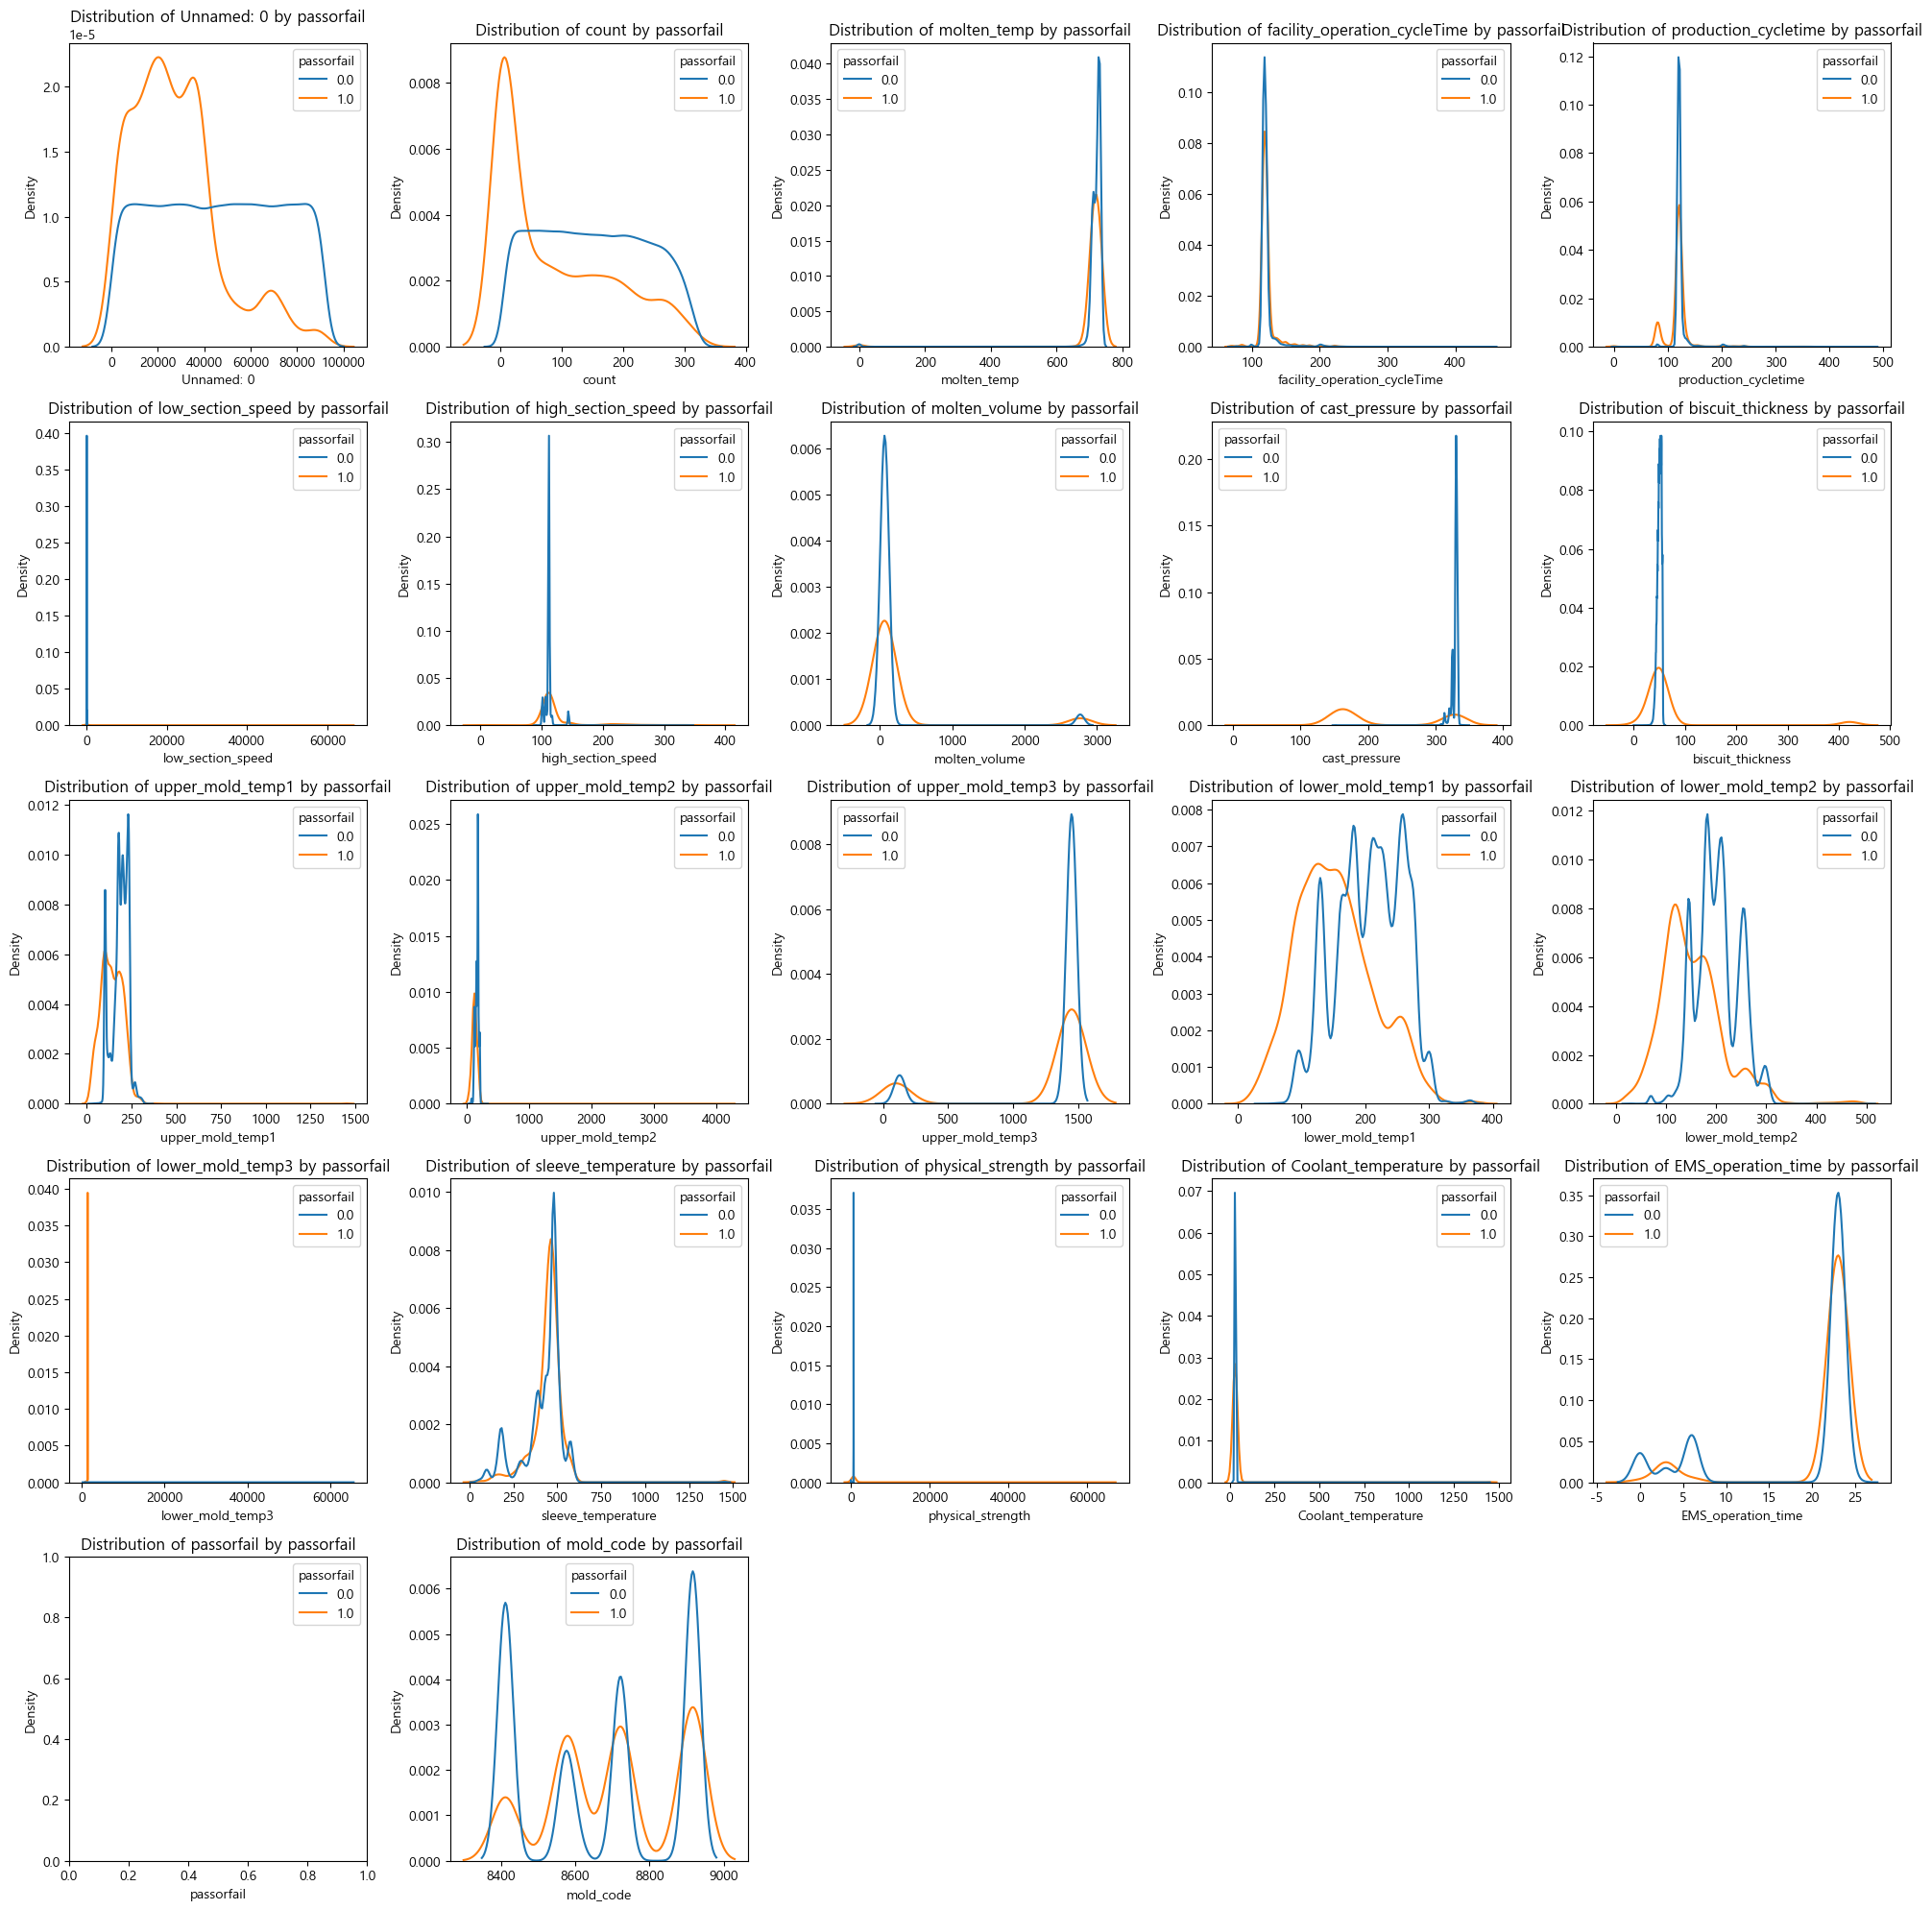

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 데이터 선택
numeric_data = data.select_dtypes(include=[np.number])

# 서브플롯 생성 (5x5)
num_cols = min(len(numeric_data.columns), 25)  # 최대 25개 컬럼
fig, axes = plt.subplots(5, 5, figsize=(20, 20))  # 5x5 서브플롯

# 플롯을 1차원 배열로 변환
axes = axes.flatten()

# KDE 플롯 그리기
for i, column in enumerate(numeric_data.columns[:num_cols]):
    sns.kdeplot(data=data, x=column, hue='passorfail', ax=axes[i], common_norm=False)
    axes[i].set_title(f'Distribution of {column} by passorfail')
    axes[i].set_xlabel(column)  # x축 레이블 설정
    axes[i].set_ylabel('Density')  # y축 레이블 설정

# 남는 서브플롯 비워두기
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# 레이아웃 조정 및 그래프 출력
plt.tight_layout()
plt.show()


### 1. Unnamed: 0

# Drop근거

In [5]:
data['Unnamed: 0']
# 단순히 인덱스가 찍힘.

0            0
1            1
2            2
3            3
4            4
         ...  
92010    92010
92011    92011
92012    92012
92013    92013
92014    92014
Name: Unnamed: 0, Length: 90096, dtype: int64

### 2. line, name, mold_name

In [6]:
data[['line', 'name', 'mold_name']].nunique()
# 유니크값이 1개다.

line         1
name         1
mold_name    1
dtype: int64

### 3. emergency_stop

In [7]:
data['emergency_stop'].nunique() # 1
data['emergency_stop'].isnull().sum() # 1

# 고유값을 1개(on)만 가지고 결측치는 하나만 가지고 있기 때문에 삭제한다.

1

### 4. time과 date

In [8]:
data[['time', 'date', 'registration_time']]
# registration_time에 정보가 다 있어서 삭제해도 될 것 같다.

,time,date,registration_time
0,2019-01-02,16:45:06,2019-01-02 16:45:06
1,2019-01-02,16:45:08,2019-01-02 16:45:08
2,2019-01-02,16:45:58,2019-01-02 16:45:58
3,2019-01-02,16:48:03,2019-01-02 16:48:03
4,2019-01-02,16:50:08,2019-01-02 16:50:08
...,...,...,...
92010,2019-03-31,23:51:29,2019-03-31 23:51:29
92011,2019-03-31,23:53:28,2019-03-31 23:53:28
92012,2019-03-31,23:55:44,2019-03-31 23:55:44
92013,2019-03-31,23:57:46,2019-03-31 23:57:46


### 5. heating_furnace

In [9]:
data['heating_furnace'] = data['heating_furnace'].fillna('C') # 결측치를 c라고 임의로 설정
data.groupby(['heating_furnace', 'passorfail']).size()

# null 값이 49146개로 결측치가 너무 많고, 값에 따라 타겟 변수의 0,1값이 딱히 큰 차이가 없어 결측치 채울수 없을것으로 판단함.

heating_furnace  passorfail
A                0.0           20627
                 1.0             476
B                0.0           20454
                 1.0             535
C                0.0           46917
                 1.0            1086
dtype: int64

### 6. count

In [10]:
# 그냥 일련번호 의미 그 이상인지 확인해보려고 함.
data[data['passorfail'] == 1]['count'].nunique() # 324
data['count'].nunique() # 334

# 불량품이 대부분의 일련번호에 고르게 분포하는것을 확인

334

### 7. molten_temp & molten_volume

데이터 형태 확인하기
- **molten_volume**: 데이터의 분포가 비대칭적이고 타겟값에 따라 분포도 차이가 없어 결측치를 채우지 않고 drop
- **molten_temp**: 데이터가 정규적으로 분포가 되어있고 타겟값에 따라 분포도 차이가 없어 중앙값으로 대체

C:\Users\USER\AppData\Local\Temp\ipykernel_16136\4109111151.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
C:\Users\USER\AppData\Local\Temp\ipykernel_16136\4109111151.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


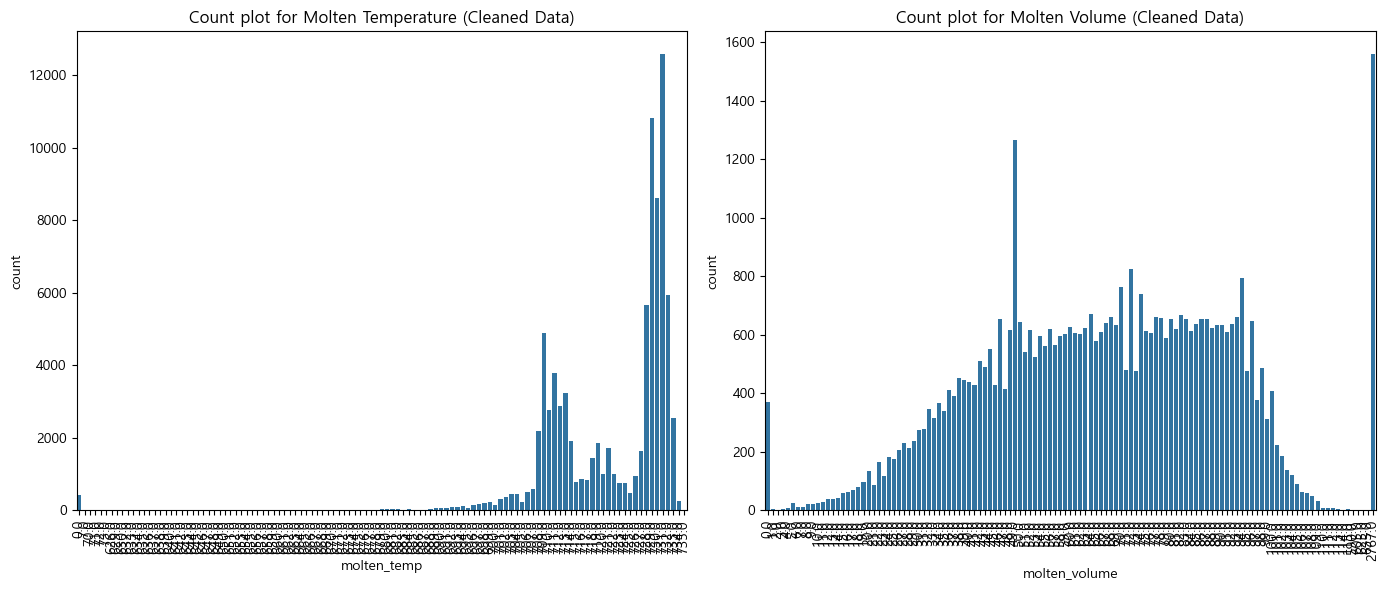

In [11]:
data = data[~data.index.duplicated(keep='first')]

# Now let's try plotting the 'molten_temp' and 'molten_volume' count plots again
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Count plot for 'molten_temp'
sns.countplot(ax=axes[0], x='molten_temp', data=data)
axes[0].set_title('Count plot for Molten Temperature (Cleaned Data)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Count plot for 'molten_volume'
sns.countplot(ax=axes[1], x='molten_volume', data=data)
axes[1].set_title('Count plot for Molten Volume (Cleaned Data)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

# Display the plots
plt.tight_layout()
plt.show()

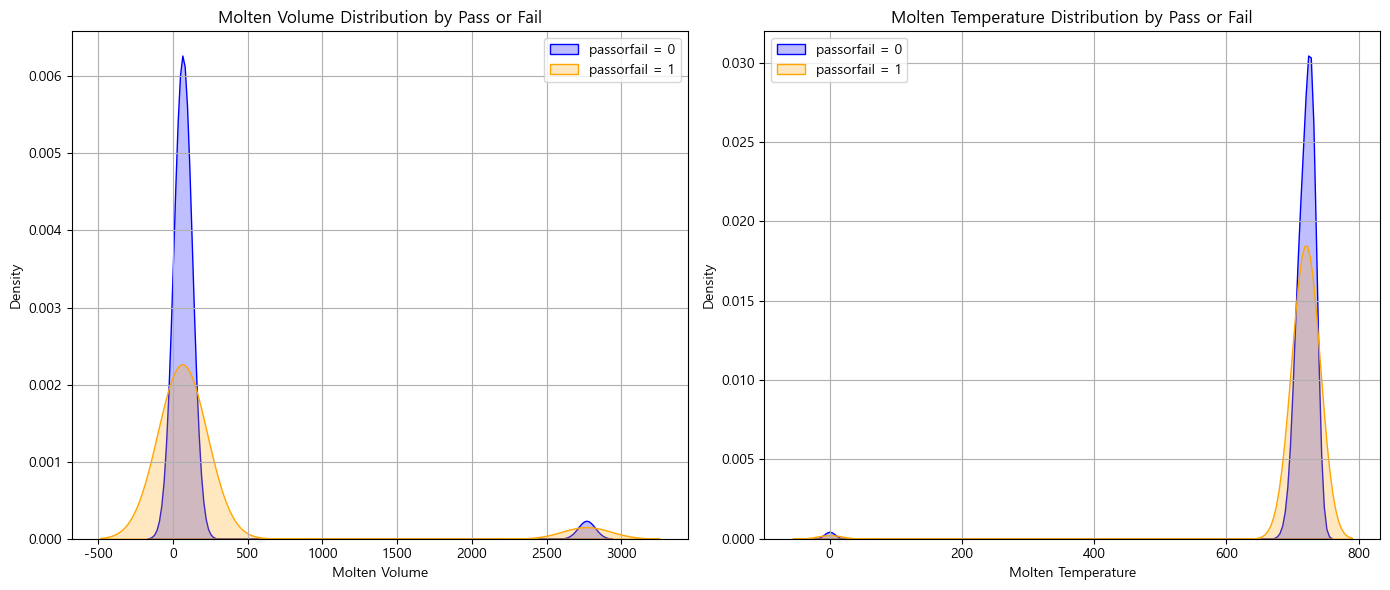

In [12]:
# 데이터 정제
data_cleaned = data[['molten_volume', 'molten_temp', 'passorfail']].dropna()

# 서브플롯 생성
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# molten_volume 분포 시각화
sns.kdeplot(data_cleaned[data_cleaned['passorfail'] == 0]['molten_volume'], 
            label='passorfail = 0', fill=True, color='blue', ax=axes[0])
sns.kdeplot(data_cleaned[data_cleaned['passorfail'] == 1]['molten_volume'], 
            label='passorfail = 1', fill=True, color='orange', ax=axes[0])

# 그래프 설정
axes[0].set_title('Molten Volume Distribution by Pass or Fail')
axes[0].set_xlabel('Molten Volume')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid(True)

# molten_temp 분포 시각화
sns.kdeplot(data_cleaned[data_cleaned['passorfail'] == 0]['molten_temp'], 
            label='passorfail = 0', fill=True, color='blue', ax=axes[1])
sns.kdeplot(data_cleaned[data_cleaned['passorfail'] == 1]['molten_temp'], 
            label='passorfail = 1', fill=True, color='orange', ax=axes[1])

# 그래프 설정
axes[1].set_title('Molten Temperature Distribution by Pass or Fail')
axes[1].set_xlabel('Molten Temperature')
axes[1].set_ylabel('Density')
axes[1].legend()
axes[1].grid(True)

# 그래프 출력
plt.tight_layout()
plt.show()



### 8. 데이터 drop하기

In [13]:
data = data.drop(columns=['Unnamed: 0', 'count', 'emergency_stop', 'heating_furnace', 'mold_name', 'name','line', 'time', 'date', 'tryshot_signal', 'molten_volume'])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90096 entries, 0 to 92014
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   working                       90095 non-null  object 
 1   molten_temp                   87835 non-null  float64
 2   facility_operation_cycleTime  90096 non-null  int64  
 3   production_cycletime          90096 non-null  int64  
 4   low_section_speed             90095 non-null  float64
 5   high_section_speed            90095 non-null  float64
 6   cast_pressure                 90095 non-null  float64
 7   biscuit_thickness             90095 non-null  float64
 8   upper_mold_temp1              90095 non-null  float64
 9   upper_mold_temp2              90095 non-null  float64
 10  upper_mold_temp3              89783 non-null  float64
 11  lower_mold_temp1              90095 non-null  float64
 12  lower_mold_temp2              90095 non-null  float64
 13  lower_

# 결측치 처리

### 1. 결측치 확인

In [15]:
data.isnull().sum()

working                            1
molten_temp                     2261
facility_operation_cycleTime       0
production_cycletime               0
low_section_speed                  1
high_section_speed                 1
cast_pressure                      1
biscuit_thickness                  1
upper_mold_temp1                   1
upper_mold_temp2                   1
upper_mold_temp3                 313
lower_mold_temp1                   1
lower_mold_temp2                   1
lower_mold_temp3                 313
sleeve_temperature                 1
physical_strength                  1
Coolant_temperature                1
EMS_operation_time                 0
registration_time                  0
passorfail                         1
mold_code                          0
dtype: int64

### 2. 결측치가 1개인 열의 연관성

In [16]:
data[data['working'].isnull()] # working에 결측치가 있는 데이터 확인해보니 결측치 1개인 열들이 함께 결측치로 되어있음
data = data.dropna(subset=['working'])
data.isnull().sum() # 결측치 1개인 열의 결측치 다 없어짐

working                            0
molten_temp                     2261
facility_operation_cycleTime       0
production_cycletime               0
low_section_speed                  0
high_section_speed                 0
cast_pressure                      0
biscuit_thickness                  0
upper_mold_temp1                   0
upper_mold_temp2                   0
upper_mold_temp3                 312
lower_mold_temp1                   0
lower_mold_temp2                   0
lower_mold_temp3                 312
sleeve_temperature                 0
physical_strength                  0
Coolant_temperature                0
EMS_operation_time                 0
registration_time                  0
passorfail                         0
mold_code                          0
dtype: int64

### 3. upper_mold_temp3

In [17]:
data['upper_mold_temp3'].describe() # 상위 75%이상으로 1449값을 가지고 있음
data.groupby(data['upper_mold_temp3'].isnull())['passorfail'].value_counts().unstack(fill_value=0)
# upper_mold_temp3가 결측치인 행중에서 passorfail이 불량픔은 없음

# 따라서 최빈값으로 대체해도 된다고 생각
# lower_mold_temp3 역시 같은 이유로 최빈값으로 대체
data['upper_mold_temp3'].fillna(data['upper_mold_temp3'].mode()[0], inplace=True)
data['lower_mold_temp3'].fillna(data['lower_mold_temp3'].mode()[0], inplace=True)

data.isnull().sum()

C:\Users\USER\AppData\Local\Temp\ipykernel_16136\3763058222.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['upper_mold_temp3'].fillna(data['upper_mold_temp3'].mode()[0], inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_16136\3763058222.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

working                            0
molten_temp                     2261
facility_operation_cycleTime       0
production_cycletime               0
low_section_speed                  0
high_section_speed                 0
cast_pressure                      0
biscuit_thickness                  0
upper_mold_temp1                   0
upper_mold_temp2                   0
upper_mold_temp3                   0
lower_mold_temp1                   0
lower_mold_temp2                   0
lower_mold_temp3                   0
sleeve_temperature                 0
physical_strength                  0
Coolant_temperature                0
EMS_operation_time                 0
registration_time                  0
passorfail                         0
mold_code                          0
dtype: int64

### 4. molten_temp & molten_volume (예측값 처리, 평균?, 최빈값?)

**주의)** 주석 처리된 코드를 돌리면 전체 실행에 코드오류가 날 수 있음

* 중앙값 대체

In [18]:
# data = pd.read_csv('data_week4.csv', encoding='cp949')
# data = data.drop(columns=['Unnamed: 0', 'count', 'emergency_stop', 'heating_furnace', 'mold_name', 'name','line', 'time', 'date'])
# data = data.set_index('registration_time') # 시계열 분석을 위한 인덱스 변환
# data.shape # (92014, 22) -> 1919행 제외하고 던부 결측치인 열이다.
# data['tryshot_signal'].unique() # array([nan, 'D'] -> 1919열 모두가 'D'값이다.

# # 그러면 'D'값일때 모두 불량품이면 조금 의미있지 않을까?
# d_rows = data[data['tryshot_signal'] == 'D']
# d_rows_passorfail_counts = d_rows['passorfail'].value_counts()
# d_rows_passorfail_counts # 'D'값이면 모두 1인것이 확인됨

# data['tryshot_signal'] = data['tryshot_signal'].fillna('no') # 결측치를 모두 no로 대체

# data.isnull().sum()
# data = data.dropna(subset=['working'])

# data['upper_mold_temp3'].fillna(data['upper_mold_temp3'].mode()[0], inplace=True)
# data['lower_mold_temp3'].fillna(data['lower_mold_temp3'].mode()[0], inplace=True)
# data.isnull().sum()


# ####


# # molten_temp 중앙값 대체
# data = data['molten_temp'].fillna(data['molten_temp'].median(), inplace=True)

# ####
# data.isnull().sum()

# for col in data.columns:
#     if data[col].dtype == 'object':
#         data[col] = data[col].astype('category').cat.codes

# from sklearn.model_selection import train_test_split
# target = 'passorfail'
# features = data.columns.difference([target])

# # 특성과 대상 변수 분리
# X = data[features]
# y = data[target]

# # 학습 세트와 테스트 세트 나누기 (Stratified 방식 사용)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# # 데이터 분리 결과 출력
# print(f'Train set: {X_train.shape}, {y_train.shape}')
# print(f'Test set: {X_test.shape}, {y_test.shape}')

# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBClassifier

# param_grid_xgb = {
#     'n_estimators': [70, 100, 150],
#     'max_depth': [3, 5, 7, 10],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.8, 1]
# }

# grid_original_xgb = GridSearchCV(XGBClassifier(random_state=42), param_grid_xgb, cv=5, scoring='f1')

# grid_original_xgb.fit(X_train, y_train)

# print("Best parameters for XGB:", grid_original_xgb.best_params_)

# y_pred = grid_original_xgb.best_estimator_.predict(X_test)


# # 성능 지표 평가
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='binary', zero_division=1)
# recall = recall_score(y_test, y_pred, average='binary', zero_division=1)
# f1 = f1_score(y_test, y_pred, average='binary', zero_division=1)

# print(f'Accuracy: {accuracy}')
# print(f'Precision: {precision}')
# print(f'Recall: {recall}')
# print(f'F1-score: {f1}')

* 랜덤포레스트 회귀 결측치 대체

In [19]:
# data = pd.read_csv('data_week4.csv', encoding='cp949')
# data = data.drop(columns=['Unnamed: 0', 'count', 'emergency_stop', 'heating_furnace', 'mold_name', 'name','line', 'time', 'date'])
# data = data.set_index('registration_time') # 시계열 분석을 위한 인덱스 변환
# data.shape # (92014, 22) -> 1919행 제외하고 던부 결측치인 열이다.
# data['tryshot_signal'].unique() # array([nan, 'D'] -> 1919열 모두가 'D'값이다.

# # 그러면 'D'값일때 모두 불량품이면 조금 의미있지 않을까?
# d_rows = data[data['tryshot_signal'] == 'D']
# d_rows_passorfail_counts = d_rows['passorfail'].value_counts()
# d_rows_passorfail_counts # 'D'값이면 모두 1인것이 확인됨

# data['tryshot_signal'] = data['tryshot_signal'].fillna('no') # 결측치를 모두 no로 대체

# data.isnull().sum()
# data = data.dropna(subset=['working'])

# data['upper_mold_temp3'].fillna(data['upper_mold_temp3'].mode()[0], inplace=True)
# data['lower_mold_temp3'].fillna(data['lower_mold_temp3'].mode()[0], inplace=True)
# data.isnull().sum()

# ####

# # 랜덤포레스트 회귀로 결측치 대체
# from sklearn.ensemble import RandomForestRegressor 
# from sklearn.model_selection import train_test_split
# import pandas as pd
# import numpy as np

# # 결측치가 없는 행과 결측치가 있는 행을 분리
# temp_train = data[data['molten_temp'].notnull()]
# temp_test = data[data['molten_temp'].isnull()]

# # 사용할 피처 선택 (molten_volume 제외)
# features = [ 'facility_operation_cycleTime', 'production_cycletime', 
#             'low_section_speed', 'high_section_speed', 'cast_pressure', 
#             'biscuit_thickness', 'upper_mold_temp1', 'upper_mold_temp2', 'upper_mold_temp3', 
#             'lower_mold_temp1', 'lower_mold_temp2', 'lower_mold_temp3', 'sleeve_temperature']


# X_train = temp_train[features]
# y_train = temp_train['molten_temp']
# X_test = temp_test[features]

# rf_temp = RandomForestRegressor(random_state=0)
# rf_temp.fit(X_train, y_train)

# temp_test['molten_temp'] = rf_temp.predict(X_test)


# data.loc[data['molten_temp'].isnull(), 'molten_temp'] = temp_test['molten_temp']


# print(data['molten_temp'].isnull().sum())   # 0이어야 함

# ####
# data.isnull().sum()

# for col in data.columns:
#     if data[col].dtype == 'object':
#         data[col] = data[col].astype('category').cat.codes

# from sklearn.model_selection import train_test_split
# target = 'passorfail'
# features = data.columns.difference([target])

# # 특성과 대상 변수 분리
# X = data[features]
# y = data[target]

# # 학습 세트와 테스트 세트 나누기 (Stratified 방식 사용)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# # 데이터 분리 결과 출력
# print(f'Train set: {X_train.shape}, {y_train.shape}')
# print(f'Test set: {X_test.shape}, {y_test.shape}')

# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBClassifier

# param_grid_xgb = {
#     'n_estimators': [70, 100, 150],
#     'max_depth': [3, 5, 7, 10],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.8, 1]
# }

# grid_original_xgb = GridSearchCV(XGBClassifier(random_state=42), param_grid_xgb, cv=5, scoring='f1')

# grid_original_xgb.fit(X_train, y_train)

# print("Best parameters for XGB:", grid_original_xgb.best_params_)

# y_pred = grid_original_xgb.best_estimator_.predict(X_test)


# # 성능 지표 평가
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='binary', zero_division=1)
# recall = recall_score(y_test, y_pred, average='binary', zero_division=1)
# f1 = f1_score(y_test, y_pred, average='binary', zero_division=1)

# print(f'Accuracy: {accuracy}')
# print(f'Precision: {precision}')
# print(f'Recall: {recall}')
# print(f'F1-score: {f1}')


* 평균값 대치

In [20]:
# data = pd.read_csv('data_week4.csv', encoding='cp949')
# data = data.drop(columns=['Unnamed: 0', 'count', 'emergency_stop', 'heating_furnace', 'mold_name', 'name','line', 'time', 'date'])
# data = data.set_index('registration_time') # 시계열 분석을 위한 인덱스 변환
# data.shape # (92014, 22) -> 1919행 제외하고 던부 결측치인 열이다.
# data['tryshot_signal'].unique() # array([nan, 'D'] -> 1919열 모두가 'D'값이다.

# # 그러면 'D'값일때 모두 불량품이면 조금 의미있지 않을까?
# d_rows = data[data['tryshot_signal'] == 'D']
# d_rows_passorfail_counts = d_rows['passorfail'].value_counts()
# d_rows_passorfail_counts # 'D'값이면 모두 1인것이 확인됨

# data['tryshot_signal'] = data['tryshot_signal'].fillna('no') # 결측치를 모두 no로 대체

# data.isnull().sum()
# data = data.dropna(subset=['working'])

# data['upper_mold_temp3'].fillna(data['upper_mold_temp3'].mode()[0], inplace=True)
# data['lower_mold_temp3'].fillna(data['lower_mold_temp3'].mode()[0], inplace=True)
# data.isnull().sum()

# ####

# # molten_temp 결측치 평균값으로 대체 
# data['molten_temp'].fillna(data['molten_temp'].mean(), inplace=True)

# ####
# data.isnull().sum()

# for col in data.columns:
#     if data[col].dtype == 'object':
#         data[col] = data[col].astype('category').cat.codes

# from sklearn.model_selection import train_test_split
# target = 'passorfail'
# features = data.columns.difference([target])

# # 특성과 대상 변수 분리
# X = data[features]
# y = data[target]

# # 학습 세트와 테스트 세트 나누기 (Stratified 방식 사용)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# # 데이터 분리 결과 출력
# print(f'Train set: {X_train.shape}, {y_train.shape}')
# print(f'Test set: {X_test.shape}, {y_test.shape}')

# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBClassifier

# param_grid_xgb = {
#     'n_estimators': [70, 100, 150],
#     'max_depth': [3, 5, 7, 10],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.8, 1]
# }

# grid_original_xgb = GridSearchCV(XGBClassifier(random_state=42), param_grid_xgb, cv=5, scoring='f1')

# grid_original_xgb.fit(X_train, y_train)

# print("Best parameters for XGB:", grid_original_xgb.best_params_)

# y_pred = grid_original_xgb.best_estimator_.predict(X_test)


# # 성능 지표 평가
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='binary', zero_division=1)
# recall = recall_score(y_test, y_pred, average='binary', zero_division=1)
# f1 = f1_score(y_test, y_pred, average='binary', zero_division=1)

# print(f'Accuracy: {accuracy}')
# print(f'Precision: {precision}')
# print(f'Recall: {recall}')
# print(f'F1-score: {f1}')


### 결론적으로 molten_temp는 중앙값으로 대체하기로 함

In [21]:
data['molten_temp'].fillna(data['molten_temp'].median(), inplace=True)
data.isnull().sum()

C:\Users\USER\AppData\Local\Temp\ipykernel_16136\495808918.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['molten_temp'].fillna(data['molten_temp'].median(), inplace=True)


working                         0
molten_temp                     0
facility_operation_cycleTime    0
production_cycletime            0
low_section_speed               0
high_section_speed              0
cast_pressure                   0
biscuit_thickness               0
upper_mold_temp1                0
upper_mold_temp2                0
upper_mold_temp3                0
lower_mold_temp1                0
lower_mold_temp2                0
lower_mold_temp3                0
sleeve_temperature              0
physical_strength               0
Coolant_temperature             0
EMS_operation_time              0
registration_time               0
passorfail                      0
mold_code                       0
dtype: int64

# 0과 1의 분포에 따른 데이터 확인하기

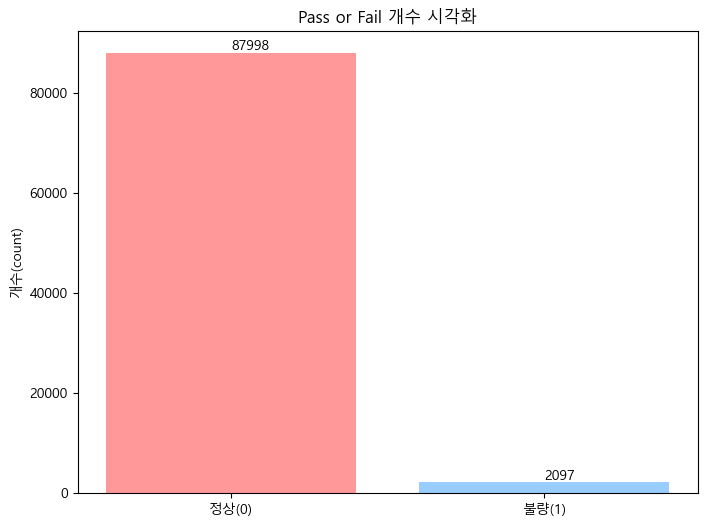

In [22]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

passorfail_counts = pd.Series([87998, 4016])
plt.figure(figsize=(8,6))
passorfail_counts = data['passorfail'].value_counts()
pastel_colors = ['#ff9999', '#99ccff']
bars = plt.bar(passorfail_counts.index, passorfail_counts.values, tick_label=['정상(0)', '불량(1)'], color=pastel_colors)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')
    

plt.title("Pass or Fail 개수 시각화")

plt.ylabel("개수(count)")
plt.show()

0과 1의 값을 갖는 각각의 데이터로 분리후 기초통계량 비교

In [23]:
group_0 = data[data['passorfail'] == 0]
group_1 = data[data['passorfail'] == 1]

group_0.describe()
group_1.describe()

,molten_temp,facility_operation_cycleTime,production_cycletime,low_section_speed,high_section_speed,cast_pressure,biscuit_thickness,upper_mold_temp1,upper_mold_temp2,upper_mold_temp3,lower_mold_temp1,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,passorfail,mold_code
count,2097.000000,2097.00000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.0,2097.000000
mean,713.356223,122.37196,117.927992,127.536481,124.660944,223.746781,65.731044,140.749165,130.046257,1205.827849,153.327611,151.462089,1444.195041,444.342871,776.483071,33.010968,20.999523,1.0,8704.756319
std,67.146739,13.25430,21.057470,1429.435233,41.884690,80.235390,82.022387,64.834294,97.095718,518.769421,59.699158,61.304098,46.037640,93.163897,2454.292146,62.041304,5.983796,0.0,173.157432
min,0.000000,70.00000,0.000000,0.000000,0.000000,41.000000,0.000000,19.000000,15.000000,42.000000,20.000000,21.000000,642.000000,27.000000,0.000000,17.000000,0.000000,1.0,8412.000000
25%,711.000000,118.00000,118.000000,102.000000,112.000000,158.000000,45.000000,98.000000,109.000000,1449.000000,110.000000,111.000000,1449.000000,423.000000,697.000000,27.000000,23.000000,1.0,8573.000000
50%,719.000000,120.00000,121.000000,110.000000,112.000000,173.000000,49.000000,137.000000,123.000000,1449.000000,148.000000,142.000000,1449.000000,458.000000,704.000000,31.000000,23.000000,1.0,8722.000000
75%,729.000000,123.00000,123.000000,110.000000,113.000000,325.000000,53.000000,184.000000,154.000000,1449.000000,189.000000,183.000000,1449.000000,482.000000,709.000000,33.000000,23.000000,1.0,8917.000000
max,735.000000,232.00000,363.000000,65534.000000,388.000000,338.000000,422.000000,1449.000000,4232.000000,1449.000000,367.000000,482.000000,1449.000000,1449.000000,65535.000000,1449.000000,23.000000,1.0,8917.000000


- 근거: 평균값과 표준편차의 차이가 있는가?  즉, 분포의 차이가 있는가?
  
의미 있을 것같은 변수: production_cycletime, low_section_speed, high_section_speed, cast_pressure, biscuit_thickness, upper_mold_temp1, upper_mold_temp2, upper_mold_temp3, lower_mold_temp1,           lower_mold_temp2, lower_mold_temp3, sleeve_temperature, physical_strength, Coolant_temperature  
의미 없을 것 같은 변수: facility_operation_cycleTime, EMS_operation_time, mold_code

### Pairplot을 통한 변수 간 관계 시각화

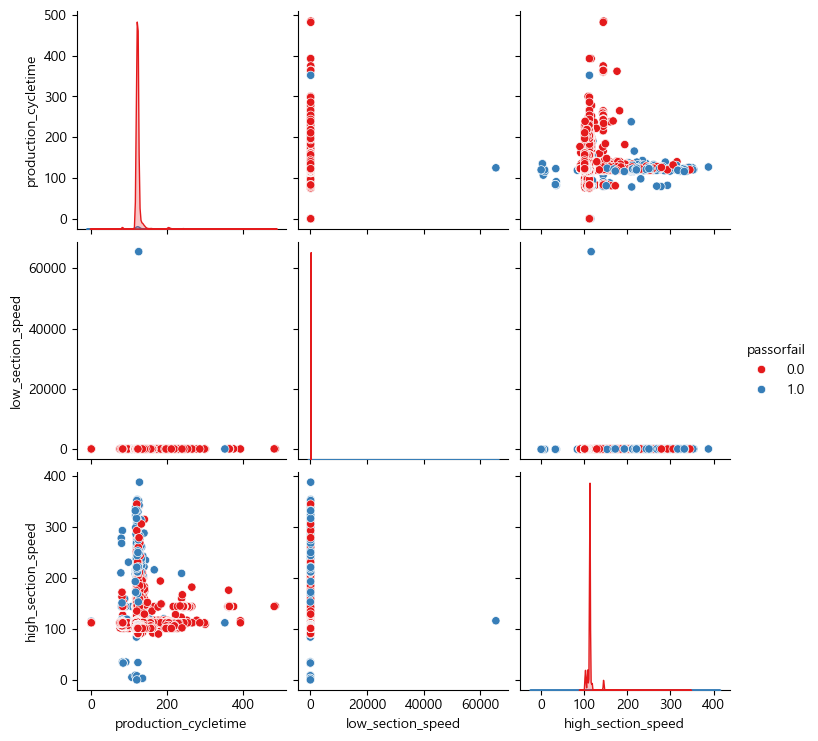

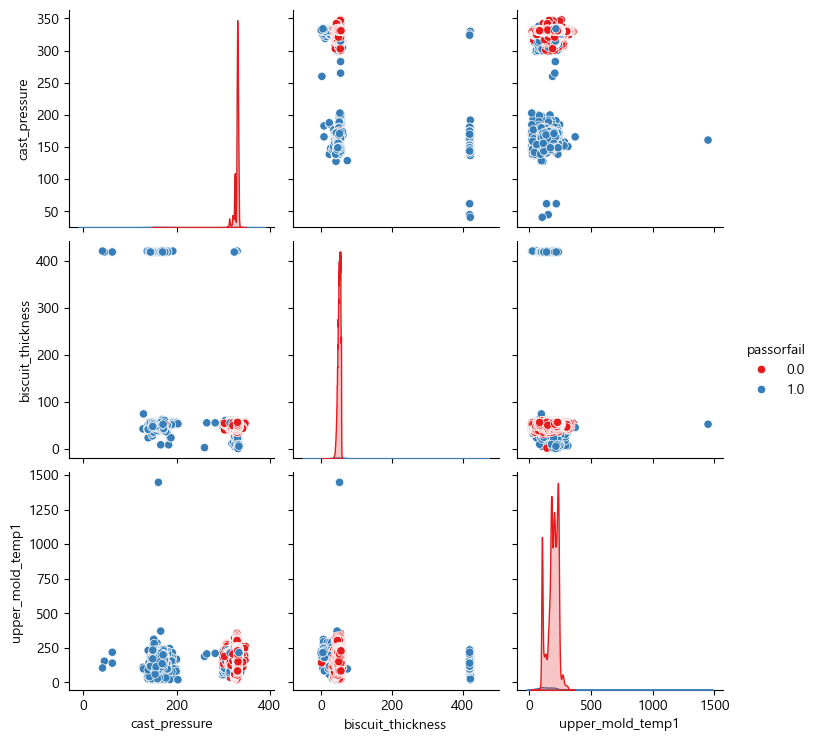

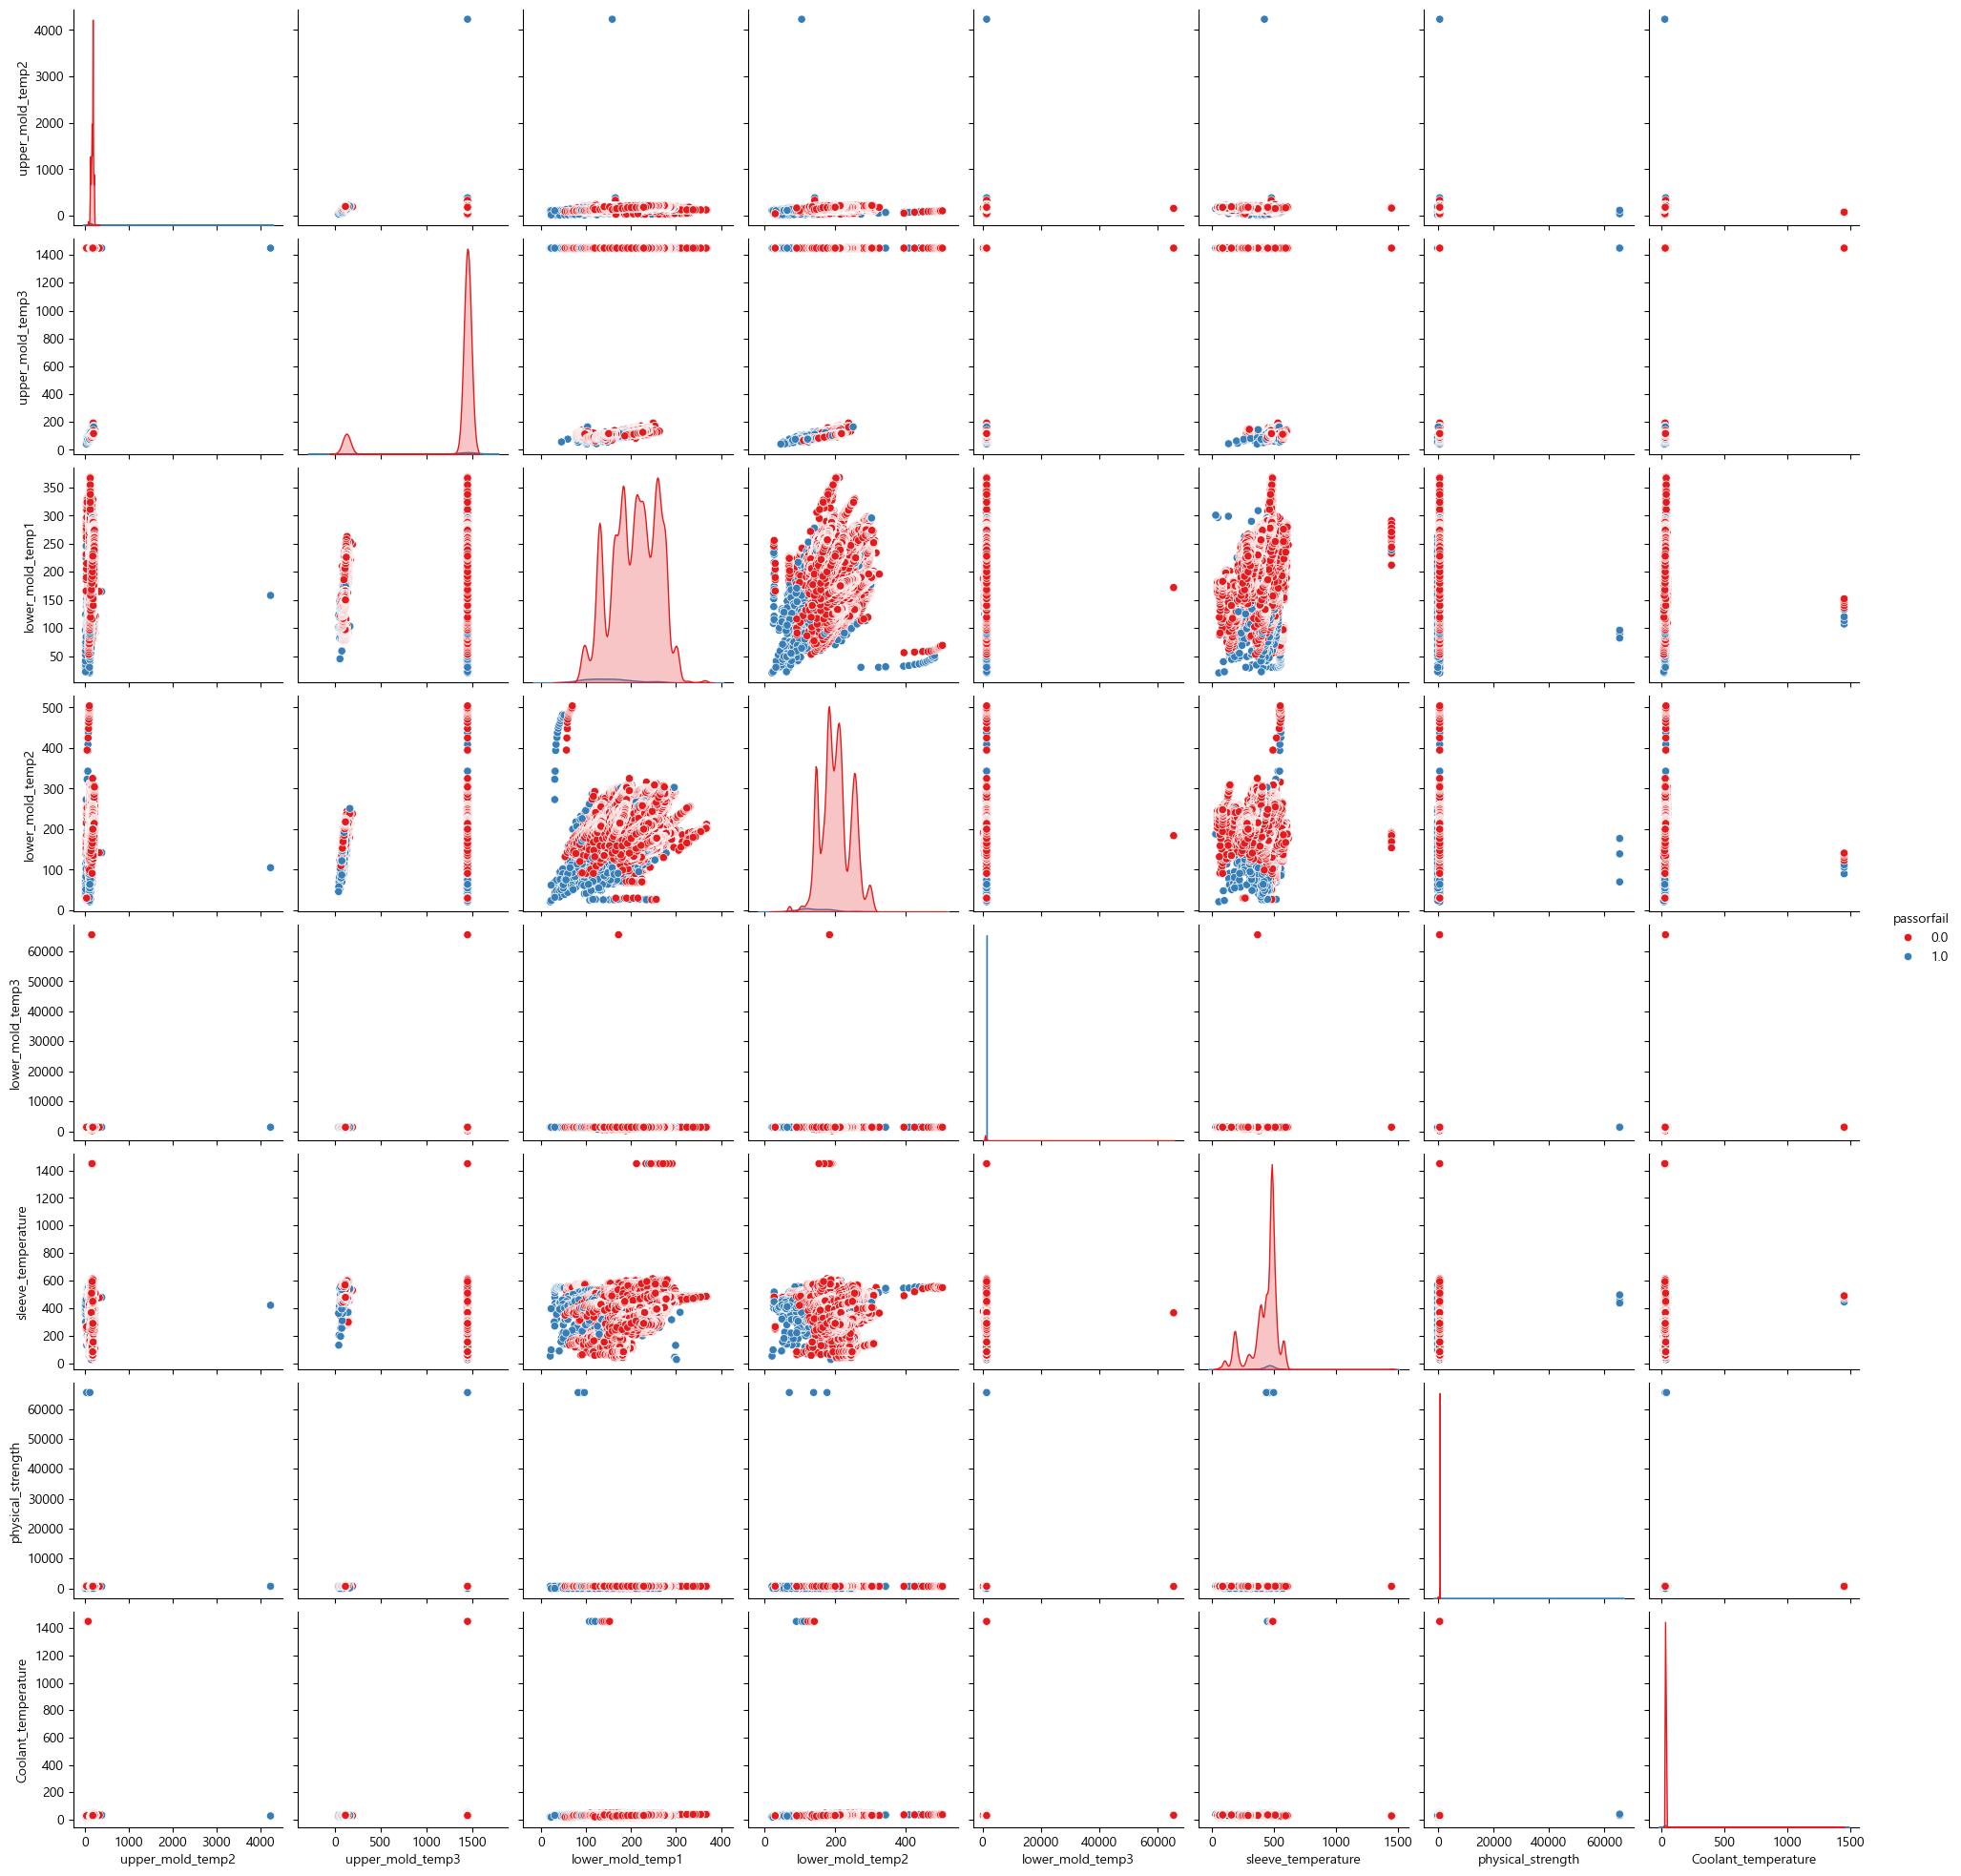

In [24]:
# 변수를 세 그룹으로 나눔
group_1 = [
    'production_cycletime', 'low_section_speed', 'high_section_speed'
]

group_2 = [
    'cast_pressure', 'biscuit_thickness', 'upper_mold_temp1'
]

group_3 = [
    'upper_mold_temp2', 'upper_mold_temp3', 'lower_mold_temp1',
    'lower_mold_temp2', 'lower_mold_temp3', 'sleeve_temperature',
    'physical_strength', 'Coolant_temperature'
]

# 그룹 1 pairplot
subset_data_1 = data[group_1 + ['passorfail']].dropna()
sns.pairplot(subset_data_1, hue='passorfail', palette='Set1', diag_kind='kde')
plt.show()

# 그룹 2 pairplot
subset_data_2 = data[group_2 + ['passorfail']].dropna()
sns.pairplot(subset_data_2, hue='passorfail', palette='Set1', diag_kind='kde')
plt.show()

# 그룹 3 pairplot
subset_data_3 = data[group_3 + ['passorfail']].dropna()
sns.pairplot(subset_data_3, hue='passorfail', palette='Set1', diag_kind='kde')
plt.show()


# IV 구하기

### IV 등급구간 정하기

- **등간격(구간별 9000개)으로 구간을 나누기**  
  -문제점: 구간별로 겹치는 값이 생김

In [25]:
import pandas as pd


# 분석할 변수 목록 (양품/불량품을 passorfail로 구분)
variables = [
    'physical_strength', 'production_cycletime', 'low_section_speed', 'high_section_speed', 
    'cast_pressure', 'biscuit_thickness', 'upper_mold_temp1', 'upper_mold_temp2', 
    'upper_mold_temp3', 'lower_mold_temp1', 'lower_mold_temp2', 'lower_mold_temp3', 
    'sleeve_temperature', 'Coolant_temperature', 'molten_temp'
]

# 결과 저장할 리스트
all_results = []

# 각 변수에 대해 구간 나누기 및 통계 계산
for var in variables:
    print(f"Processing variable: {var}")
    
    # 데이터에서 필요한 열만 선택하고 정렬
    data_foc = data[[var, 'passorfail']].sort_values(by=var, ascending=False)

    # 각 구간의 크기 설정 (9200개 단위로 나눔)
    bin_size = 9000
    num_bins = 10
    total_records = len(data_foc)

    # 빈도를 계산할 데이터프레임 생성
    bins = []
    min_values = []
    max_values = []
    total_counts = []
    good_counts = []
    bad_counts = []

    for i in range(num_bins):
        start_idx = i * bin_size
        if i == num_bins - 1:
            # 마지막 구간의 끝을 데이터의 마지막까지 확장
            end_idx = total_records
        else:
            end_idx = (i + 1) * bin_size

        bin_data = data_foc.iloc[start_idx:end_idx]

        # 각 구간에 대한 최소값, 최대값, 개수 계산
        min_values.append(bin_data[var].min())
        max_values.append(bin_data[var].max())
        total_counts.append(len(bin_data))
        good_counts.append((bin_data['passorfail'] == 0).sum())  # 양품 개수 (passorfail == 0)
        bad_counts.append((bin_data['passorfail'] == 1).sum())   # 불량품 개수 (passorfail == 1)

        # 구간 정보 추가
        bins.append(i + 1)

    # 데이터프레임으로 결과 저장
    result_df = pd.DataFrame({
        '변수': var,
        '구간': bins,
        '최소값': min_values,
        '최대값': max_values,
        '전체건수': total_counts,
        '양품건수': good_counts,
        '불량품건수': bad_counts
    })

    # 구성비 계산 (비율)
    result_df['양품구성비'] = result_df['양품건수'] / result_df['양품건수'].sum() * 100
    result_df['불량품구성비'] = result_df['불량품건수'] / result_df['불량품건수'].sum() * 100

    # 결과 리스트에 저장
    all_results.append(result_df)

# 모든 변수의 결과를 하나의 DataFrame으로 결합
final_result_df = pd.concat(all_results, ignore_index=True)

# 최종 결과 출력
print(final_result_df)

# 엑셀로 저장하려면 아래 코드 사용
final_result_df.to_excel('등간격 클러스터링.xlsx', index=False)


Processing variable: physical_strength
Processing variable: production_cycletime
Processing variable: low_section_speed
Processing variable: high_section_speed
Processing variable: cast_pressure
Processing variable: biscuit_thickness
Processing variable: upper_mold_temp1
Processing variable: upper_mold_temp2
Processing variable: upper_mold_temp3
Processing variable: lower_mold_temp1
Processing variable: lower_mold_temp2
Processing variable: lower_mold_temp3
Processing variable: sleeve_temperature
Processing variable: Coolant_temperature
Processing variable: molten_temp
                    변수  구간    최소값      최대값  전체건수  양품건수  불량품건수      양품구성비  \
0    physical_strength   1  718.0  65535.0  9000  8965     35  10.187732   
1    physical_strength   2  712.0    718.0  9000  8802    198  10.002500   
2    physical_strength   3  708.0    712.0  9000  8646    354   9.825223   
3    physical_strength   4  706.0    708.0  9000  8691    309   9.876361   
4    physical_strength   5  703.0    706.0  

- **K-means 클러스터링으로 구간을 나누기**  

In [26]:
import pandas as pd
from sklearn.cluster import KMeans

# 분석할 변수 목록
variables = [
    'production_cycletime', 'low_section_speed', 'high_section_speed', 
    'cast_pressure', 'biscuit_thickness', 'upper_mold_temp1', 
    'upper_mold_temp2', 'upper_mold_temp3', 'lower_mold_temp1', 
    'lower_mold_temp2', 'lower_mold_temp3', 'sleeve_temperature', 
    'physical_strength', 'Coolant_temperature', 'molten_temp'
]

# 결과를 저장할 리스트
results = []

# 각 변수에 대해 클러스터링 수행
for var in variables:
    # 해당 변수로만 구성된 데이터프레임 생성
    data_var = data[[var, 'passorfail']].dropna()
    
    # KMeans로 클러스터링 (10개의 클러스터로 나누기)
    kmeans = KMeans(n_clusters=10, random_state=42)
    data_var['cluster'] = kmeans.fit_predict(data_var[[var]])
    
    # 각 클러스터에 대한 통계 계산
    cluster_ranges = data_var.groupby('cluster').agg(
        min_value=(var, 'min'),
        max_value=(var, 'max'),
        mean_value=(var, 'mean'),
        count=('passorfail', 'count'),
        failures=('passorfail', lambda x: (x == 1).sum())  # passorfail이 1인 데이터 수
    ).reset_index()
    
    # 정렬
    cluster_ranges = cluster_ranges.sort_values(by='min_value', ascending=False)

    # 변수 이름을 추가하여 결과를 리스트에 저장
    cluster_ranges['variable'] = var
    results.append(cluster_ranges)

# 모든 결과를 하나의 DataFrame으로 결합
final_results = pd.concat(results, ignore_index=True)

# CSV 파일로 저장
final_results.to_csv('K-means클러스터링.csv', index=False)


In [27]:
# 중요하지 않다고 생각한 변수도 함께 넣어서 분석하기로 함함

import pandas as pd
from sklearn.cluster import KMeans

# 분석할 변수 목록
variables = [
    'facility_operation_cycleTime', 'EMS_operation_time', 'mold_code'
]

# 결과를 저장할 리스트
results = []

# 각 변수에 대해 클러스터링 수행
for var in variables:
    # 해당 변수로만 구성된 데이터프레임 생성
    data_var = data[[var, 'passorfail']].dropna()
    
    # KMeans로 클러스터링 (10개의 클러스터로 나누기)
    kmeans = KMeans(n_clusters=10, random_state=42)
    data_var['cluster'] = kmeans.fit_predict(data_var[[var]])
    
    # 각 클러스터에 대한 통계 계산
    cluster_ranges = data_var.groupby('cluster').agg(
        min_value=(var, 'min'),
        max_value=(var, 'max'),
        mean_value=(var, 'mean'),
        count=('passorfail', 'count'),
        failures=('passorfail', lambda x: (x == 1).sum())  # passorfail이 1인 데이터 수
    ).reset_index()
    
    # 정렬
    cluster_ranges = cluster_ranges.sort_values(by='min_value', ascending=False)

    # 변수 이름을 추가하여 결과를 리스트에 저장
    cluster_ranges['variable'] = var
    results.append(cluster_ranges)

# 모든 결과를 하나의 DataFrame으로 결합
final_results = pd.concat(results, ignore_index=True)

# CSV 파일로 저장
final_results.to_csv('K-means클러스터링2.csv', index=False)


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


* 추후 csv파일을 통해 엑셀을 이용한 IV분석 진행

# 의사결정나무로 불량률에 영향미치는 변수파악

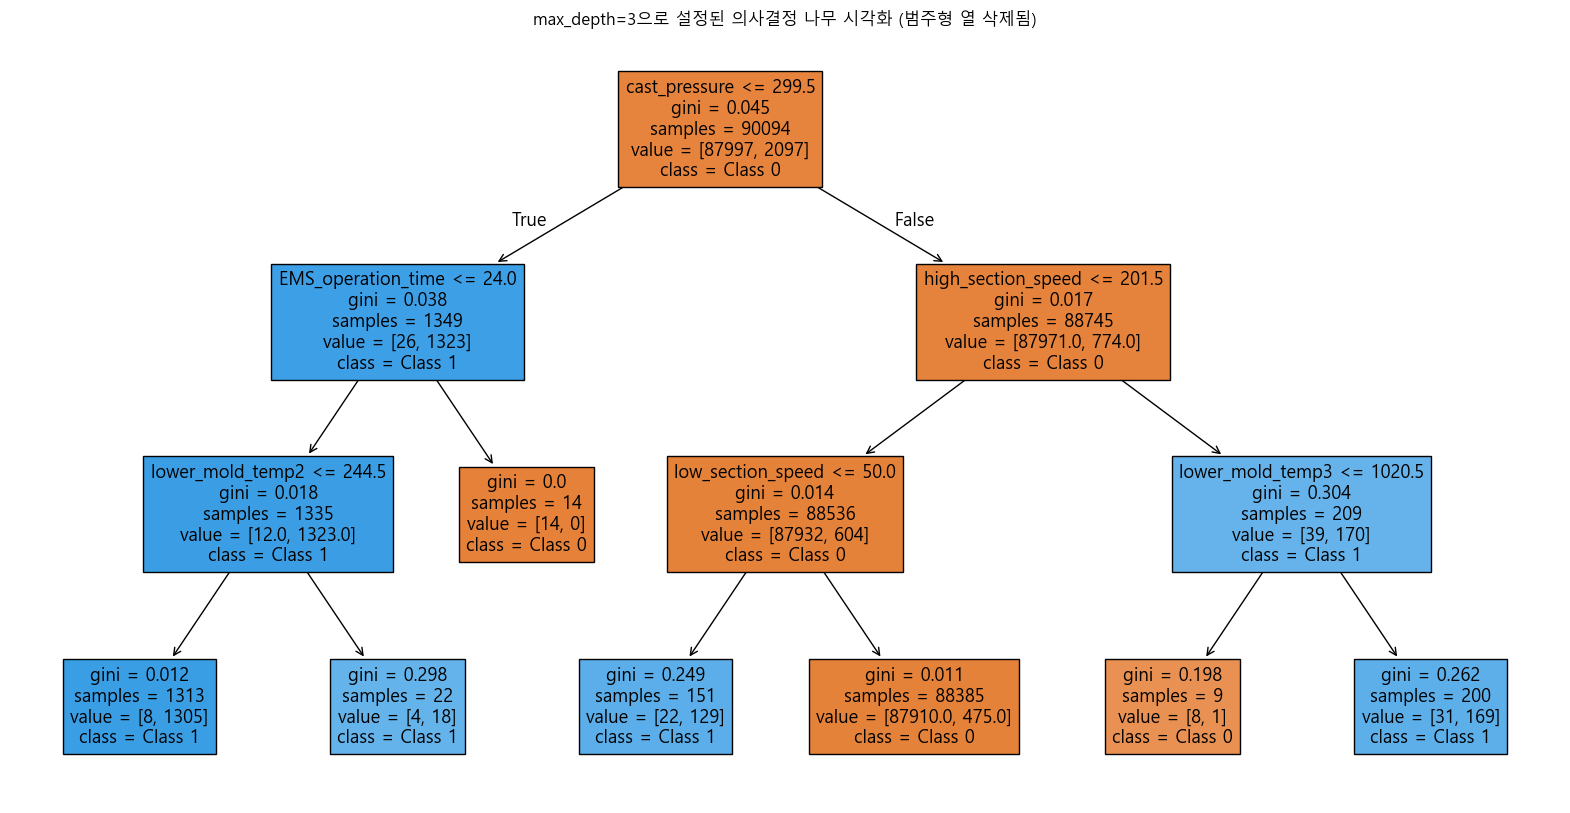

In [28]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

X_numeric = data.drop(columns=['working', 'registration_time','passorfail'])

X = data.drop('passorfail', axis=1)
#  = X.select_dtypes(exclude=['object'])
y = data['passorfail']

X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.00001, random_state=42)

# Fit a decision tree classifier to find conditions causing defects
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Plot the updated decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, filled=True, feature_names=X_numeric.columns, class_names=['Class 0', 'Class 1'])
plt.title("max_depth=3으로 설정된 의사결정 나무 시각화 (범주형 열 삭제됨)")
plt.show()

# 공정최적화(불량률 줄이기)를 위한 변수의 조건 제안

* cast_pressure에서 구한 구간 조건으로 1차 필터링

In [29]:
data1 = data[(data['cast_pressure'] >= 317) & (data['cast_pressure'] <= 348)]

In [30]:
import pandas as pd
from sklearn.cluster import KMeans

# 분석할 변수 목록
variables = [
    'production_cycletime', 'low_section_speed', 'high_section_speed', 
    'biscuit_thickness', 'upper_mold_temp1', 
    'upper_mold_temp2', 'upper_mold_temp3', 'lower_mold_temp1', 
    'lower_mold_temp2', 'lower_mold_temp3', 'sleeve_temperature', 
    'physical_strength', 'Coolant_temperature', 'molten_temp',
    'facility_operation_cycleTime', 'EMS_operation_time', 'mold_code'
]

# 결과를 저장할 리스트
results = []

# 각 변수에 대해 클러스터링 수행
for var in variables:
    # 해당 변수로만 구성된 데이터프레임 생성
    data_var = data1[[var, 'passorfail']].dropna()
    
    # KMeans로 클러스터링 (10개의 클러스터로 나누기)
    kmeans = KMeans(n_clusters=10, random_state=42)
    data_var['cluster'] = kmeans.fit_predict(data_var[[var]])
    
    # 각 클러스터에 대한 통계 계산
    cluster_ranges = data_var.groupby('cluster').agg(
        min_value=(var, 'min'),
        max_value=(var, 'max'),
        mean_value=(var, 'mean'),
        count=('passorfail', 'count'),
        failures=('passorfail', lambda x: (x == 1).sum())  # passorfail이 1인 데이터 수
    ).reset_index()
    
    # 정렬
    cluster_ranges = cluster_ranges.sort_values(by='min_value', ascending=False)

    # 변수 이름을 추가하여 결과를 리스트에 저장
    cluster_ranges['variable'] = var
    results.append(cluster_ranges)

# 모든 결과를 하나의 DataFrame으로 결합
final_results = pd.concat(results, ignore_index=True)

# CSV 파일로 저장
final_results.to_csv('구간조건 1.csv', index=False)


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


* biscuit_thickness으로 구한 구간 조건으로 2차 필터링

In [31]:
# 조건 1과 조건 2를 동시에 만족하는 데이터
data2 = data[(data['cast_pressure'] >= 317) & (data['cast_pressure'] <= 348) &
                     (data['biscuit_thickness'] >= 44) & (data['biscuit_thickness'] <= 60)]

# 이후 data_combined를 사용하여 클러스터링 수행
# 아래에서 data1, data2 대신 data_combined로 변경하여 사용

In [32]:
import pandas as pd
from sklearn.cluster import KMeans

# 분석할 변수 목록
variables = [
    'production_cycletime', 'low_section_speed', 'high_section_speed', 
    'upper_mold_temp1', 
    'upper_mold_temp2', 'upper_mold_temp3', 'lower_mold_temp1', 
    'lower_mold_temp2', 'lower_mold_temp3', 'sleeve_temperature', 
    'physical_strength', 'Coolant_temperature', 'molten_temp',
    'facility_operation_cycleTime', 'EMS_operation_time', 'mold_code'
]

# 결과를 저장할 리스트
results = []

# 각 변수에 대해 클러스터링 수행
for var in variables:
    # 해당 변수로만 구성된 데이터프레임 생성
    data_var = data2[[var, 'passorfail']].dropna()
    
    # KMeans로 클러스터링 (10개의 클러스터로 나누기)
    kmeans = KMeans(n_clusters=10, random_state=42)
    data_var['cluster'] = kmeans.fit_predict(data_var[[var]])
    
    # 각 클러스터에 대한 통계 계산
    cluster_ranges = data_var.groupby('cluster').agg(
        min_value=(var, 'min'),
        max_value=(var, 'max'),
        mean_value=(var, 'mean'),
        count=('passorfail', 'count'),
        failures=('passorfail', lambda x: (x == 1).sum())  # passorfail이 1인 데이터 수
    ).reset_index()
    
    # 정렬
    cluster_ranges = cluster_ranges.sort_values(by='min_value', ascending=False)

    # 변수 이름을 추가하여 결과를 리스트에 저장
    cluster_ranges['variable'] = var
    results.append(cluster_ranges)

# 모든 결과를 하나의 DataFrame으로 결합
final_results = pd.concat(results, ignore_index=True)

# CSV 파일로 저장
final_results.to_csv('구간조건 2.csv', index=False)


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


교호작용없이 구간을 설정하고 불량률을 계산

In [33]:
data3 = data[(data['cast_pressure'] >= 317) & (data['cast_pressure'] <= 348) &
             (data['biscuit_thickness'] >= 45) & (data['biscuit_thickness'] <= 54) &
             (data['lower_mold_temp2'] >= 175) & (data['lower_mold_temp2'] <= 343)]

In [34]:
data3['passorfail'].value_counts()

passorfail
0.0    50752
1.0      144
Name: count, dtype: int64